In [1]:
import mxnet as mx

In [2]:
mnist = mx.test_utils.get_mnist()

In [3]:
batch = 100

In [4]:
train_iter = mx.io.NDArrayIter(data=mnist['train_data'], label=mnist['train_label'], batch_size=batch, shuffle=True)
val_iter = mx.io.NDArrayIter(data=mnist['test_data'], label=mnist['test_label'], batch_size=batch)

In [5]:
data = mx.sym.var('data')
data = mx.sym.flatten(data=data)

In [6]:
fc1 = mx.sym.FullyConnected(data=data, num_hidden=128)
act1 = mx.sym.Activation(data=fc1, act_type='relu')

fc2 = mx.sym.FullyConnected(act1, num_hidden=64)
act2 = mx.sym.Activation(data=fc2, act_type='relu')

In [7]:
fc3 = mx.sym.FullyConnected(data=act2, num_hidden=10)
mlp = mx.sym.SoftmaxOutput(data=fc3, name='softmax')

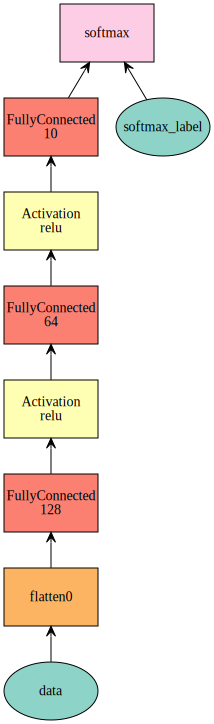

In [8]:
mx.viz.plot_network(symbol=mlp)

In [9]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [10]:
mlp_model = mx.mod.Module(symbol=mlp, context=mx.cpu())

In [11]:
mlp_model.fit(train_iter, eval_data=val_iter, optimizer='sgd',
              optimizer_params={'learning_rate':0.1}, eval_metric='acc',
              batch_end_callback=mx.callback.Speedometer(batch, 100),
              num_epoch=10)

INFO:root:Epoch[0] Batch [100]	Speed: 72645.37 samples/sec	accuracy=0.111485
INFO:root:Epoch[0] Batch [200]	Speed: 82458.72 samples/sec	accuracy=0.111400
INFO:root:Epoch[0] Batch [300]	Speed: 93165.56 samples/sec	accuracy=0.115900
INFO:root:Epoch[0] Batch [400]	Speed: 87189.88 samples/sec	accuracy=0.110300
INFO:root:Epoch[0] Batch [500]	Speed: 78765.53 samples/sec	accuracy=0.111800
INFO:root:Epoch[0] Train-accuracy=0.224747
INFO:root:Epoch[0] Time cost=0.738
INFO:root:Epoch[0] Validation-accuracy=0.289000
INFO:root:Epoch[1] Batch [100]	Speed: 71150.56 samples/sec	accuracy=0.432673
INFO:root:Epoch[1] Batch [200]	Speed: 71225.23 samples/sec	accuracy=0.613800
INFO:root:Epoch[1] Batch [300]	Speed: 67923.73 samples/sec	accuracy=0.751500
INFO:root:Epoch[1] Batch [400]	Speed: 73200.04 samples/sec	accuracy=0.809600
INFO:root:Epoch[1] Batch [500]	Speed: 65363.30 samples/sec	accuracy=0.828300
INFO:root:Epoch[1] Train-accuracy=0.852323
INFO:root:Epoch[1] Time cost=0.883
INFO:root:Epoch[1] Validat

In [12]:
test_iter = mx.io.NDArrayIter(mnist['test_data'], mnist['test_label'], batch)
# predict accuracy of mlp
acc = mx.metric.Accuracy()
mlp_model.score(test_iter, acc)
print(acc)
assert acc.get()[1] > 0.96

EvalMetric: {'accuracy': 0.96940000000000004}
